In [1]:
#from funzione_load import preprocessing_funct
#from funzione_load import age_mapping, workclass_mapping, education_mapping, education_mapping, education_num_mapping, marital_status_mapping, occupation_mapping, relationship_mapping, race_mapping, sex_mapping, hours_per_week_mapping, native_country_mapping
#from funzione_load import inverse_age_mapping, inverse_workclass_mapping, inverse_education_mapping, inverse_education_mapping, inverse_education_num_mapping, inverse_marital_status_mapping, inverse_occupation_mapping, inverse_relationship_mapping, inverse_race_mapping, inverse_sex_mapping, inverse_hours_per_week_mapping, inverse_native_country_mapping
from preprocessing_for_adult import preprocessing_funct_not_enc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [2]:
#SEED = 42
#np.random.seed(SEED)

In [3]:
def encoding_funct(df_train, df_test, df_val, df_holdout, categorical_cols):
    df_train_enc = df_train.copy()
    df_test_enc = df_test.copy()
    df_val_enc = df_val.copy()
    df_holdout_enc = df_holdout.copy()
    # Initialize dictionaries
    categorical_names = {}
    le_dict = {}

    
    for feature in categorical_cols:
        if feature < len(df_train_enc.columns):  
            le = LabelEncoder()
            transformed_values = le.fit_transform(df_train_enc.iloc[:, feature])
            df_train_enc.iloc[:, feature] = transformed_values
            categorical_names[feature] = le.classes_
            le_dict[feature] = le
        else:
            print(f"Index {feature} is out of bounds for columns in df_train_enc.")
            
            
    for feature in categorical_cols:
        if feature < len(df_test_enc.columns):
            le = LabelEncoder()
            transformed_values = le.fit_transform(df_test_enc.iloc[:, feature])
            df_test_enc.iloc[:, feature] = transformed_values
            categorical_names[feature] = le.classes_
            le_dict[feature] = le
        else:
            print(f"Index {feature} is out of bounds for columns in df_test_enc.")
    
    for feature in categorical_cols:
        if feature < len(df_val_enc.columns):
            le = LabelEncoder()
            transformed_values = le.fit_transform(df_val_enc.iloc[:, feature])
            df_val_enc.iloc[:, feature] = transformed_values
            categorical_names[feature] = le.classes_
            le_dict[feature] = le
        else:
            print(f"Index {feature} is out of bounds for columns in df_val_enc.")
    for feature in categorical_cols:
        if feature < len(df_holdout_enc.columns):
            le = LabelEncoder()
            transformed_values = le.fit_transform(df_holdout_enc.iloc[:, feature])
            df_holdout_enc.iloc[:, feature] = transformed_values
            categorical_names[feature] = le.classes_
            le_dict[feature] = le
        else:
            print(f"Index {feature} is out of bounds for columns in df_holdout_enc.")

    '''# Print out the encoding details
    for feature, classes in categorical_names.items():
        print(f'Feature index {feature}: ')
        print('Encoded values: ', list(range(len(classes))))
        print('Original values: ', classes)
        print()

    # Handling non-categorical columns
    non_categorical_cols = [i for i in range(len(df_train_enc.columns)) if i not in categorical_cols]

    for col in non_categorical_cols:
        le = LabelEncoder()
        transformed_values = le.fit_transform(df_train_enc.iloc[:, col])
        df_train_enc.iloc[:, col] = transformed_values'''
    return df_train_enc, df_test_enc, df_val_enc, df_holdout_enc

In [4]:
def get_original_label(column_name, encoded_value):
        original_labels_dict = {
        'workclass': ['Government', 'Never-worked', 'Private', 'Self-emp', 'Unknown', 'Without-pay'],
        'education': ["Bachelor's Degree", 'Doctorate Degree', "Master's Degree", 'Non Graduated'],
        'marital-status': ['Divorced', 'Married', 'Never-married', 'Separated', 'Widowed'],
        'occupation': ['Self-emp-occ', 'Government-occ', 'Other-service', 'Private-occ', 'Prof-specialty', 'Unknown'],
        'relationship': ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'],
        'race': ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'],
        'sex': ['Female', 'Male'],
        'native-country': ['Other', 'African-American-Black', 'Asian', 'Caucasian-White', 'Latino-Hispanic'], 
        'age_group': ['17-24', '25-34', '35-44', '45-54', '55-64', '65-100'], 
        'edu_num_group' : ['1 Preschool', '2-3 Elementary School', '4-5 Middle School', '6-8 High School', '9 High School Graduate', '10 College', "11-12 Associate's Degree", "13 Bachelor's Degree", "14 Master's Degree", '15 Professional Degree', '16 Doctorate Degree'], 
        'hours_per_week_group': ['Part-time', 'Full-time', 'Overtime']
        }
        return original_labels_dict[column_name][encoded_value]

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv("adult.data", header = None, names = col_names)


In [6]:
df_train, df_val, df_test, df_holdout = preprocessing_funct_not_enc(df)
#controllo divisione dataset
print(f"TRAIN SET ROWS: ", df_train.shape[0]) #su 32536, il 40%  dovrebbe essere circa 13014
print(f"VALIDATIION SET ROWS: ", df_val.shape[0]) #su 32536, il 20%  dovrebbe essere circa 6500
print(f"HOLDOUT SET ROWS: ", df_holdout.shape[0])
print(f"TEST SET ROWS: ", df_test.shape[0])


TRAIN SET ROWS:  13014
VALIDATIION SET ROWS:  6507
HOLDOUT SET ROWS:  6508
TEST SET ROWS:  6508


In [7]:
#per risolvere un errore DA SISTEMARE
#df_train.drop(columns=['hours-per-week'], inplace=True)
#df_test.drop(columns=['hours-per-week'], inplace=True)
#df_val.drop(columns=['hours-per-week'], inplace=True)
#df_holdout.drop(columns=['hours-per-week'], inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13014 entries, 29908 to 5372
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   workclass             13014 non-null  object  
 1   fnlwgt                13014 non-null  float64 
 2   education             13014 non-null  object  
 3   marital-status        13014 non-null  object  
 4   occupation            13014 non-null  object  
 5   relationship          13014 non-null  object  
 6   race                  13014 non-null  object  
 7   sex                   13014 non-null  object  
 8   capital-gain          13014 non-null  float64 
 9   capital-loss          13014 non-null  float64 
 10  native-country        13014 non-null  object  
 11  income                13014 non-null  int64   
 12  age_group             13014 non-null  category
 13  edu_num_group         13014 non-null  category
 14  hours_per_week_group  13014 non-null  category
dtypes: c

In [9]:
categorical_cols = [0, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14]

In [10]:
df_train_enc, df_test_enc, df_val_enc, df_holdout_enc = encoding_funct(df_train, df_test, df_val, df_holdout, categorical_cols)

/var/folders/y1/6s02yc5x0hq01rcscsshbqwr0000gn/T/ipykernel_1012/4242469921.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 2 5 ... 5 3 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_train_enc.iloc[:, feature] = transformed_values
/var/folders/y1/6s02yc5x0hq01rcscsshbqwr0000gn/T/ipykernel_1012/4242469921.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[10  1 10 ...  7  9  2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_train_enc.iloc[:, feature] = transformed_values
/var/folders/y1/6s02yc5x0hq01rcscsshbqwr0000gn/T/ipykernel_1012/4242469921.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 0]' has dtype incompatible with category, please explic

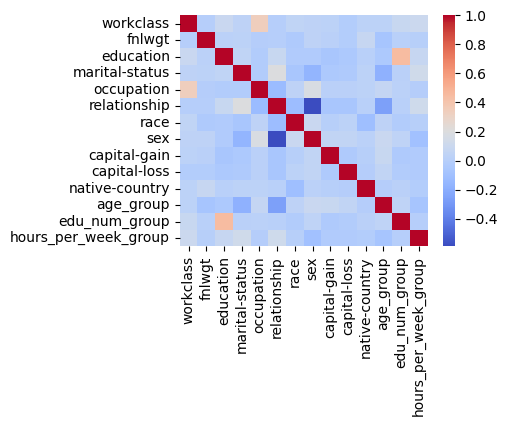

In [11]:
df_train_no_income = df_train_enc.drop(columns = 'income')
plt.figure(figsize=(4, 3))
g = sns.heatmap(df_train_no_income.corr(),
                annot = False,
                cmap = "coolwarm")

DECISION TREE CLASSIFIER

In [12]:
X_train = df_train_enc.drop(columns = 'income', axis = 1)
y_train = df_train_enc['income']

X_test = df_test_enc.drop(columns = 'income', axis = 1)
y_test = df_test_enc['income']

X_val = df_val_enc.drop(columns = 'income', axis = 1)
y_val = df_val_enc['income']

X_holdout = df_holdout_enc.drop(columns = 'income', axis = 1)
y_holdout = df_holdout_enc['income']

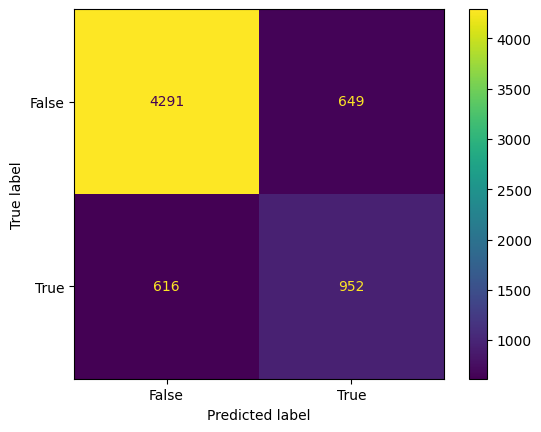

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[False, True])
disp.plot()
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4940
           1       0.59      0.61      0.60      1568

    accuracy                           0.81      6508
   macro avg       0.73      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508



In [15]:
tn, fp, fn, tp = cm_dt.ravel()

accuracy = accuracy_score(y_test, y_pred)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'False Positive Rate': [false_positive_rate],
    'False Negative Rate': [false_negative_rate],
    'False Positives': [fp],
    'False Negatives': [fn]
})

In [16]:
#prima della ricerca dei sottogruppi 
metrics_df

,Accuracy,False Positive Rate,False Negative Rate,False Positives,False Negatives
0,0.805624,0.131377,0.392857,649,616


SUBGROUPS SEARCH

In [17]:
from divexplorer import DivergenceExplorer
from divexplorer import DivergencePatternProcessor
from divexplorer.outcomes import get_false_positive_rate_outcome

-Identifico i gruppi applicando DivExplorer sul validation

-Integro nel training set dati che matchano sottogruppi problematici prendendoli dall'holdout 

-Ripetro training e test 

In [18]:
#predizioni per il validation set
y_pred_val_dt = dt.predict(X_val)

df_val_dt = X_val.copy()
df_val_dt['y_val_true'] = y_val
df_val_dt['y_pred'] = y_pred_val_dt

df_val_dt.head()

,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,age_group,edu_num_group,hours_per_week_group,y_val_true,y_pred
18761,2,0.077282,3,0,4,1,4,0,0.00000,0.000000,0,2,1,1,0,0
27582,3,0.047901,3,1,4,0,4,1,0.00000,0.000000,0,5,1,2,1,0
30911,2,0.174473,3,3,4,4,2,0,0.03887,0.000000,0,1,1,1,0,0
11128,0,0.011908,2,1,2,0,2,1,0.00000,0.506923,0,3,4,1,1,1
683,0,0.284255,3,3,2,4,2,1,0.00000,0.000000,0,0,1,1,0,0


In [19]:
y_trues = df_val_dt["y_val_true"]
y_preds = df_val_dt["y_pred"]

df_val_dt['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)

sarebbe piu "comodo" se riuscissi a decodificare e applicare il DivExplorer al df_val non encoded

In [20]:
fp_diver = DivergenceExplorer(df_val_dt)
attributes = ['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'native-country', 'age_group', 'edu_num_group', 'hours_per_week_group']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.2, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
pd.set_option('display.max_colwidth', None)

FP_fm.head(5)

,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.238973,"(race=4, capital-gain=0.0, hours_per_week_group=1, native-country=0, capital-loss=0.0, relationship=0, marital-status=1)",0.363021,0.223519,13.267867,7,1555.0
1,0.238973,"(capital-gain=0.0, hours_per_week_group=1, native-country=0, capital-loss=0.0, relationship=0, race=4)",0.363021,0.223519,13.267867,6,1555.0
2,0.238973,"(capital-gain=0.0, hours_per_week_group=1, native-country=0, capital-loss=0.0, sex=1, relationship=0, race=4)",0.363021,0.223519,13.267867,7,1555.0
3,0.238973,"(race=4, capital-gain=0.0, hours_per_week_group=1, native-country=0, capital-loss=0.0, sex=1, relationship=0, marital-status=1)",0.363021,0.223519,13.267867,8,1555.0
4,0.259259,"(race=4, capital-gain=0.0, hours_per_week_group=1, native-country=0, sex=1, relationship=0, marital-status=1)",0.362069,0.222567,13.492036,7,1687.0


There are 4 subgroup with highest false-positive rate and highest support count, when the minimum support is 20%,  one of them is:

(relationship=0, hours_per_week_group=1, native-country=0, marital-status=1, race=4, capital-loss=0.0, capital-gain=0.0),
that is:

(relationship=Husband, hours_per_week_group=Full-time, native-country=other, marital-status=Married, race=White, capital-loss=0, capital-gain=0.0)



In [21]:
print(get_original_label("native-country", 0))
print(get_original_label("relationship", 0))
print(get_original_label("race", 4))
print(get_original_label("hours_per_week_group", 1))
print(get_original_label("sex", 1))
print(get_original_label("marital-status", 1))

Other
Husband
White
Full-time
Male
Married


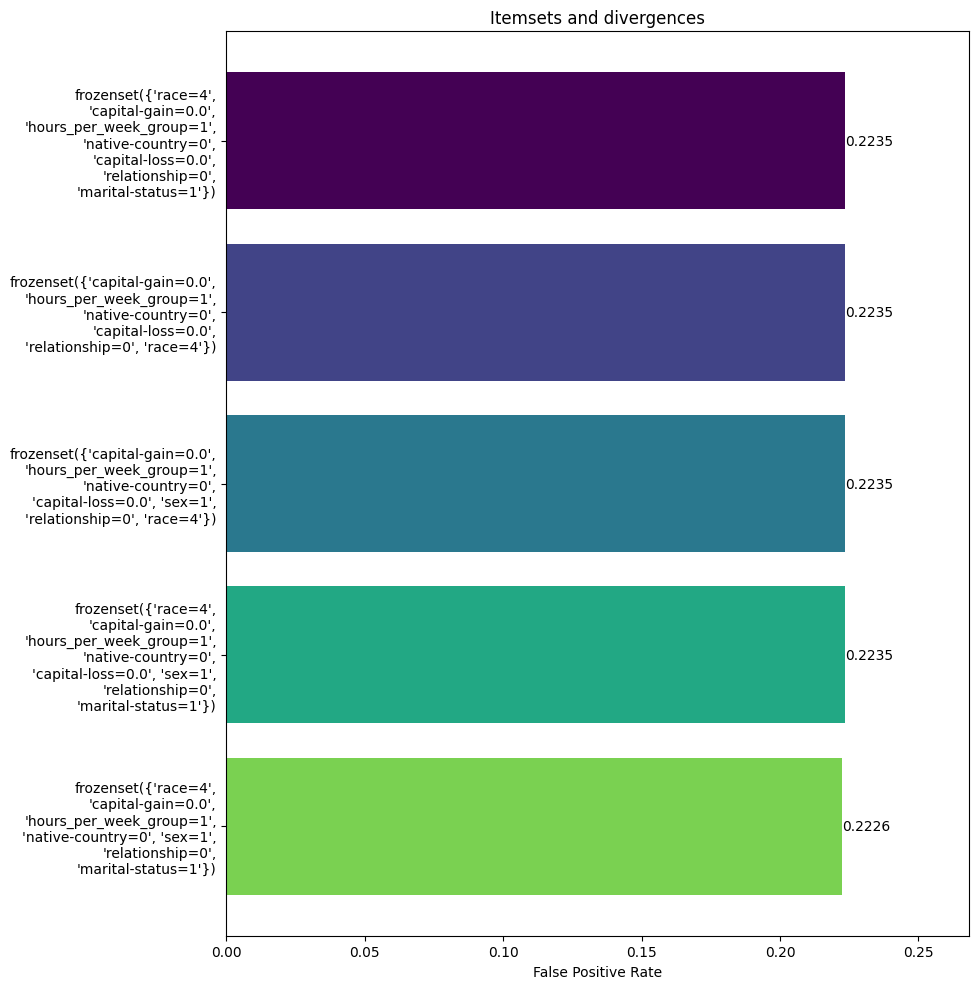

In [22]:
fp_data = [
    (FP_fm['itemset'].iloc[0], FP_fm['fp_div'].loc[0]),
    (FP_fm['itemset'].iloc[1], FP_fm['fp_div'].loc[1]),
    (FP_fm['itemset'].iloc[2], FP_fm['fp_div'].loc[2]),
    (FP_fm['itemset'].iloc[3], FP_fm['fp_div'].loc[3]),
    (FP_fm['itemset'].iloc[4], FP_fm['fp_div'].loc[4]),
]

# desc without dt
sorted_fp_data = sorted(fp_data[1:], key=lambda x: x[1], reverse=True)

# extract fp values
sorted_fp_values = [fp_data[0][1]] + [item[1] for item in sorted_fp_data]
sorted_itemsets = [fp_data[0][0]] + [item[0] for item in sorted_fp_data]

# Colour
num_colors = len(sorted_fp_values)
colors = plt.cm.viridis(np.linspace(0, 0.8, num_colors))  # Utilizziamo la mappa di colori "viridis"

# barplot
plt.figure(figsize=(10, 10))  #
bars = plt.barh(np.arange(len(sorted_itemsets)), sorted_fp_values, color=colors)
plt.yticks(np.arange(len(sorted_itemsets)), sorted_itemsets)
plt.gca().set_yticklabels(sorted_itemsets, rotation=0, ha='right', wrap=True)
plt.xlabel('False Positive Rate')
plt.title('Itemsets and divergences')

# add vaues
for i, fp_value in enumerate(sorted_fp_values):
    plt.text(fp_value, i, f'{fp_value:.4f}', va='center', ha='left')

plt.tight_layout()  
plt.gca().invert_yaxis()  
plt.xlim(right=max(sorted_fp_values) * 1.2) 
plt.show()


Shapley values

In [23]:
#LOCAL
fp_details = DivergencePatternProcessor(FP_fm, 'fp')
pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)
sv = fp_details.shapley_value(pattern)
sv

frozenset({'race=4', 'capital-gain=0.0', 'hours_per_week_group=1', 'native-country=0', 'capital-loss=0.0', 'relationship=0', 'marital-status=1'})


{frozenset({'race=4'}): 0.00824687322620625,
 frozenset({'capital-gain=0.0'}): 0.006119687993121788,
 frozenset({'hours_per_week_group=1'}): 0.023022015672214794,
 frozenset({'native-country=0'}): 0.004775832420005285,
 frozenset({'capital-loss=0.0'}): -0.0009073520568987606,
 frozenset({'relationship=0'}): 0.09509417424413899,
 frozenset({'marital-status=1'}): 0.08716826555352492}

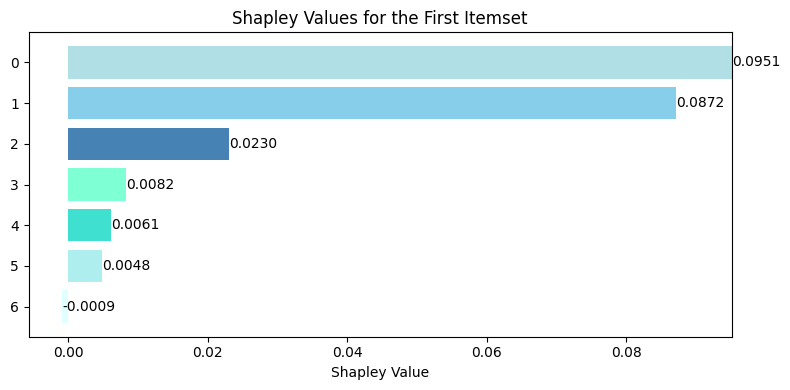

In [24]:
sorted_sv = sorted(sv.values(), reverse=True)
sorted_keys = sorted(sv, key=sv.get, reverse=True)

# Drop 'frozenset'
sorted_keys_labels = [', '.join(item) for item in sorted_keys]

# Colour
colors = ['#B0E0E6', '#87CEEB', '#4682B4', '#7FFFD4', '#40E0D0', '#AFEEEE', '#E0FFFF', '#F0FFFF']

# Graph
plt.figure(figsize=(8, 4))
bars = plt.barh(np.arange(len(sorted_sv)), sorted_sv, color=colors[:len(sorted_sv)])
plt.yticks(np.arange(len(sorted_sv)))
plt.xlabel('Shapley Value')
plt.title("Shapley Values for the First Itemset")

# Add shapley values
for i, value in enumerate(sorted_sv):
    plt.text(value, i, f'{value:.4f}', va='center', ha='left', color='black')  # 0.003 corrisponde a circa 3 mm

plt.gca().invert_yaxis()  #desc order
plt.subplots_adjust()
plt.xlim(right=max(sorted_sv) * 1) 
plt.tight_layout()
plt.show()

In [25]:
#GLOBAL
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'relationship=0'}): 0.014273216692342598,
 frozenset({'marital-status=1'}): 0.013838032265541683,
 frozenset({'education=0'}): 0.004151921148859003,
 frozenset({'age_group=2'}): 0.00395591678735951,
 frozenset({'sex=1'}): 0.0034410351259817665,
 frozenset({'occupation=2'}): 0.001883865201481749,
 frozenset({'hours_per_week_group=1'}): 0.004346146167317368,
 frozenset({'occupation=4'}): 0.0004931145506200831,
 frozenset({'race=4'}): 0.001492712628419498,
 frozenset({'capital-gain=0.0'}): 7.695328896883269e-05,
 frozenset({'capital-loss=0.0'}): -0.0005762078297258482,
 frozenset({'native-country=0'}): -0.0002183266336312405,
 frozenset({'edu_num_group=1'}): -0.0008147917577831229,
 frozenset({'workclass=2'}): -0.003502455610030817,
 frozenset({'edu_num_group=10'}): -0.0022568920264502664,
 frozenset({'education=3'}): -0.0035504027108090633,
 frozenset({'age_group=1'}): -0.0025745981023389194,
 frozenset({'relationship=1'}): -0.004066007655479259,
 frozenset({'sex=0'}): -0.004

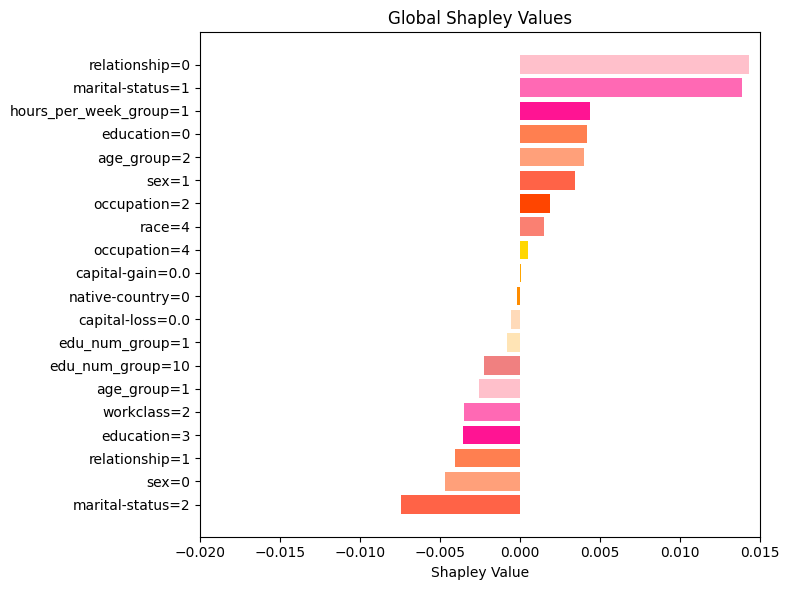

In [26]:
#order gsv desc
sorted_gsv = sorted(gsv.items(), key=lambda x: x[1], reverse=True)

# extract itemset and Shapley values
itemsets = [' '.join(item) for item, value in sorted_gsv]
shapley_values = [value for item, value in sorted_gsv]

# Colours
colors = ['#FFC0CB', '#FF69B4', '#FF1493', '#FF7F50', '#FFA07A', '#FF6347', '#FF4500', '#FA8072', '#FFD700', '#FFA500', '#FF8C00', '#FFDAB9', '#FFE4B5', '#F08080']

# Graph of Shapley values
plt.figure(figsize=(8, 6))
bars = plt.barh(itemsets, shapley_values, color=colors[:len(itemsets)])
plt.xlabel('Shapley Value')
plt.title('Global Shapley Values')

# Add numbers
#for i, value in enumerate(shapley_values):
#    plt.text(value + 0.0005, i, format(value, '.4f'), va='center', ha='left', color='black')

plt.gca().invert_yaxis() 
plt.xlim(-0.020, 0.015)
plt.tight_layout()
plt.show()

BIAS MITIGATION: ADDING DATA: prendo dati dall'hold-out e li aggiungo al train set, questi dati matchano gli itemset trovati prima (i primi 4 )
(relationship=0, hours_per_week_group=1, native-country=0, marital-status=1, race=4, capital-loss=0.0, capital-gain=0.0)	
(relationship=0, hours_per_week_group=1, native-country=0, race=4, capital-loss=0.0, capital-gain=0.0)	
(relationship=0, hours_per_week_group=1, native-country=0, race=4, sex=1, capital-loss=0.0, capital-gain=0.0)	
(relationship=0, hours_per_week_group=1, native-country=0, marital-status=1, race=4, sex=1, capital-loss=0.0, capital-gain=0.0)	

In [27]:
n_rows = 1000
filtered_df = df_holdout_enc[
    (df_holdout_enc['relationship'] == 0) |
    (df_holdout_enc['hours_per_week_group'] == 1)|
    (df_holdout_enc['native-country'] == 0) |
    (df_holdout_enc['marital-status'] == 1) |
    (df_holdout_enc['race'] == 4)|
    (df_holdout_enc['capital-gain'] == 0.0) |
    (df_holdout_enc['capital-loss'] == 0.0) |
     (df_holdout_enc['sex'] == 1)
    
    ]

top_n_rows = filtered_df.head(n_rows)

df_train_mitigated = pd.concat([df_train_enc, filtered_df], ignore_index=True)
df_train_mitigated.head()


,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,age_group,edu_num_group,hours_per_week_group
0,3,0.139824,3,1,4,0,4,1,0.000000,0.0,0,0,1,10,1
1,2,0.012960,3,1,4,0,4,1,0.000000,0.0,0,0,2,1,1
2,2,0.328882,3,4,0,1,4,0,0.063601,0.0,0,0,5,10,1
3,2,0.109851,3,1,2,0,4,1,0.000000,0.0,0,0,5,10,1
4,2,0.115383,3,0,4,1,4,1,0.033250,0.0,0,0,2,10,0


Train and test again

In [28]:

X_train_mitigated = df_train_mitigated.drop(columns = 'income', axis = 1)
y_train_mitigated = df_train_mitigated['income']

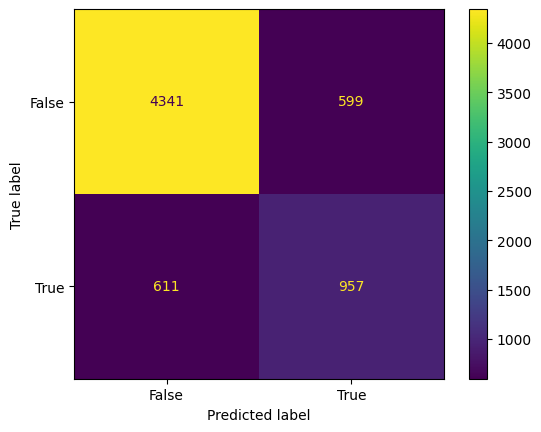

In [29]:
dt.fit(X_train_mitigated, y_train_mitigated)
y_mitigated_pred = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_mitigated_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[False, True])
disp.plot()
plt.show()

In [30]:
print(classification_report(y_test, y_mitigated_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4940
           1       0.62      0.61      0.61      1568

    accuracy                           0.81      6508
   macro avg       0.75      0.74      0.75      6508
weighted avg       0.81      0.81      0.81      6508



In [31]:
print(f"accuracy prima: ", accuracy_score(y_test, y_pred) )
print(f"accuracy dopo: ", accuracy_score(y_test, y_mitigated_pred) )

accuracy prima:  0.8056238475722188
accuracy dopo:  0.8140749846342963


In [32]:
def calculate_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else 0

In [33]:
calculate_fpr(y_true=y_test, y_pred=y_pred)

0.13137651821862348

In [34]:
calculate_fpr(y_true=y_test, y_pred=y_mitigated_pred)

0.12125506072874494

L'accuracy aumenta un po' e il false possitive rate diminuisce un po

Riprovo supponendo di aggiungere righe finche l'accuracy non aumenta del 10%

In [35]:
#aggiungo 100 righe oer ogni iterazione
batch_size = 100

# Calcola l'accuratezza iniziale
def calculate_accuracy(df_train, df_test):

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Accuratezza iniziale
initial_accuracy = calculate_accuracy(df_train_mitigated, df_test_enc)
print(f"Accuratezza iniziale: {initial_accuracy:}")

while True:
    batch = df_holdout_enc.head(batch_size)
    df_train_mitigated = pd.concat([df_train_mitigated, batch], ignore_index=True)
    df_holdout_enc = df_holdout_enc.iloc[batch_size:].reset_index(drop=True)
    new_accuracy = calculate_accuracy(df_train_mitigated, df_test_enc)
    print(f"Nuova accuratezza: {new_accuracy:}")

    if new_accuracy >= initial_accuracy * 1.10:
        print("L'accuratezza è aumentata del 10% almeno.")
        break

    if len(df_holdout_enc) < batch_size:
        print("Target non raggiungibile")
        break

Accuratezza iniziale: 0.8076213890596189
Nuova accuratezza: 0.8080823601720959
Nuova accuratezza: 0.8070067609096496
Nuova accuratezza: 0.8082360172095882
Nuova accuratezza: 0.8059311616472035
Nuova accuratezza: 0.8070067609096496
Nuova accuratezza: 0.8065457897971727
Nuova accuratezza: 0.8070067609096496
Nuova accuratezza: 0.8050092194222496
Nuova accuratezza: 0.8054701905347265
Nuova accuratezza: 0.8060848186846957
Nuova accuratezza: 0.8060848186846957
Nuova accuratezza: 0.8079287031346035
Nuova accuratezza: 0.8070067609096496
Nuova accuratezza: 0.8079287031346035
Nuova accuratezza: 0.8077750460971113
Nuova accuratezza: 0.8065457897971727
Nuova accuratezza: 0.8050092194222496
Nuova accuratezza: 0.8082360172095882
Nuova accuratezza: 0.8070067609096496
Nuova accuratezza: 0.8053165334972342
Nuova accuratezza: 0.8056238475722188
Nuova accuratezza: 0.8054701905347265
Nuova accuratezza: 0.8070067609096496
Nuova accuratezza: 0.8053165334972342
Nuova accuratezza: 0.8076213890596189
Nuova acc